In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [1]:
import os
import sys
import random as rand

import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET

"""To be used for image and bounding boxes augmentation"""
# import albumentations as A

# Check versions of libraries
print(f"Python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"OpenCV: {cv2.__version__}")

Python: 3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
numpy: 1.19.4
matplotlib: 3.3.3
OpenCV: 4.5.2


In [2]:
CURRENT_DIR = os.getcwd()
TRAINING_SET_DIR = os.path.join(CURRENT_DIR, "images", "training_set")
VALIDATION_SET_DIR = os.path.join(CURRENT_DIR, "images", "validation_set")

IMAGE_WIDTH = 250
IMAGE_HEIGHT = 250

In [3]:
def parse_annotations(xml_file: str):
    """https://stackoverflow.com/questions/53317592/reading-pascal-voc-annotations-in-python"""
    """Parses the annotation file and returns the bounding boxes and breed names"""

    tree = ET.parse(xml_file)
    root = tree.getroot()

    all_bounding_boxes = []

    for boxes in root.iter("object"):
        filename = root.find("object").find("name").text

        ymin, xmin, ymax, xmax = None, None, None, None

        # Finds the bounding box coordinates of the dog within the image
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        bounding_box = [xmin, ymin, xmax, ymax]
        all_bounding_boxes.append(bounding_box)

    return filename, all_bounding_boxes

In [4]:
def load_data(DIR, IMAGE_WIDTH, IMAGE_HEIGHT):
    """Loads image data and breed names from directory"""

    # Lists for image data and breed names
    image_data = []
    breed_names = []
    bounding_boxes = []

    for breed_folder in os.listdir(DIR):
        for file in os.listdir(os.path.join(DIR, breed_folder)):
            file_path = os.path.join(DIR, breed_folder, file)

            # Looks for image files by checking extension
            if file_path.endswith(".jpg"):
                # Image is read and resized with cv2, then added to the list
                image = cv2.imread(file_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                resized_image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
                image_data.append(resized_image)

            # Only checks annotation files
            else:
                breed_name, bounding_box = parse_annotations(file_path)
                breed_names.append(breed_name)
                bounding_boxes.append(bounding_box[0])

    return image_data, breed_names, bounding_boxes

In [5]:
image_data_train, breed_names_train, bounding_boxes_train\
    = load_data(TRAINING_SET_DIR, IMAGE_WIDTH, IMAGE_HEIGHT)
image_data_validation, breed_names_validation, bounding_boxes_validation\
    = load_data(VALIDATION_SET_DIR, IMAGE_WIDTH, IMAGE_HEIGHT)

In [6]:
def image_view(images, labels):
    """Displays a 3x3 subplot of randomly selected images"""

    fig, ax = plt.subplots(3, 3, figsize=(12, 12))

    for i in range(3):
        for j in range(3):
            # Selects a random image and displays it
            ind = rand.randint(0, len(images))
            ax[i, j].imshow(images[ind])

            # Displays the breed's name as the title
            ax[i, j].set_title(f"Breed: {labels[ind]}")

    plt.show()

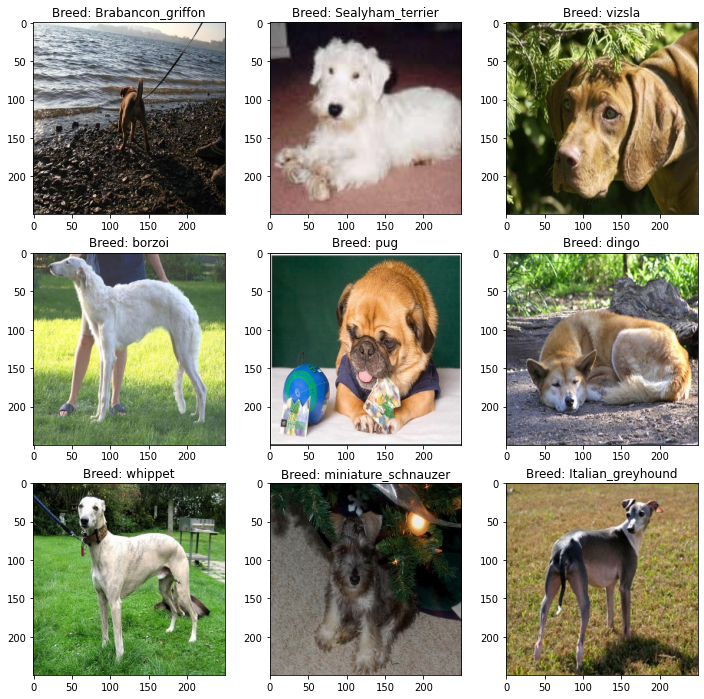

In [7]:
image_view(image_data_train, breed_names_train)